# Complex functions
```{index} Complex function
```
A complex function is a function that has a subset of the complex numbers as a domain and the complex numbers as a codomain:

$$ f : D \to \mathbb{C}, \quad D \subset \mathbb{C}. $$

We say that $f$ is a function of a complex variable. A complex function $f(z)$ may also be resolved into its real part $u(x, y)$ and imaginary part $v(x, y)$:

$$ f(z) = f(x + iy) = u(x, y) + iv(x, y), $$

where $u$ and $v$ are functions of two real variables.

(colour_wheel_graph)=
## Colour wheel graph
```{index} Colour wheel graph
```
A question we need to think about is how to plot complex functions. In the section on exponential function below we will present some other techniques, but let us now jump immediately into one which will often be most useful for us: **[domain coloring](https://en.wikipedia.org/wiki/Domain_coloring)** or a **colour wheel graph**. In this representation, the phase (argument) is assigned a hue on the colour wheel, so we call this a *phase portrait*. Sometimes the colour brightness will also be modified to present another quantity - in our case we will use this to show lines of constant modulus.

By doing this we can represent our complex function in a plane, as we would with real functions. It will also be very easy for us to spot several very important features of functions.

Let us explain this on two complex functions: $f(z) = z$ and $f(z) = 1/z$:

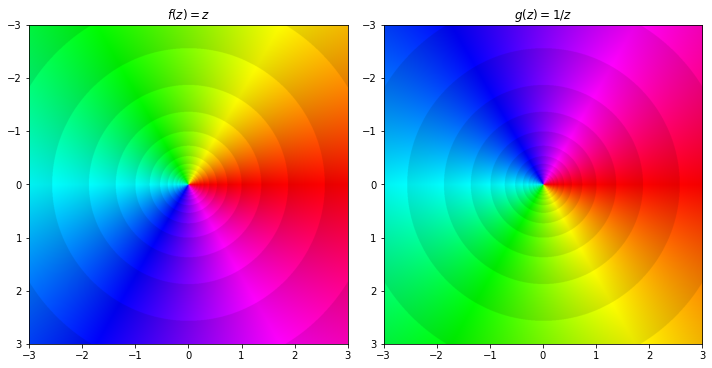

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb


def phaseplot(ax, f, x=None, y=None):

    a = np.log(np.abs(f)) * 20 / (2*np.pi)
    a = a - a//1
    _amin = np.min(a)
    _amax = np.max(a)
    
    h = (np.angle(-f) + np.pi) / (2*np.pi)
    v = (a - _amin) / (_amax - _amin) * (1 - 0.9) + 0.9
    
    if x is None:
        extent = None
    else:
        extent = [min(x), max(x), min(y), max(y)]
    
    img = hsv_to_rgb(np.dstack((h, np.ones(f.shape), v)))
    
    ax.imshow(img, extent=extent)
    ax.invert_yaxis()
    
    
x = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, x)
Z = X + 1j*Y

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

phaseplot(ax1, Z, x, x)
phaseplot(ax2, 1/Z, x, x)

ax1.set_title(r'$f(z) = z$')
ax2.set_title(r'$g(z) = 1/z$')

plt.tight_layout()
plt.show()

It is clearly seen on the left figure for $f(z) = z$ that the red colour corresponds to arg$f(z) \approx 0$, cyan to arg$f(z) \approx \pi$ and so on. So the counter-clockwise colour order is red-green-blue-red. In this case, $z=0$ is a **zero** of $f(z) = z$.

Now on the plot on the right, showing $g(z) = 1/z$, the colour wheel is reversed to be red-blue-green-red. This is because $z=0$ is a **pole** of $g(z) = 1/z$, which is a type of singularity (we will see more examples of singularities later). In general, if a point $z$ is a zero of $1/f$ then it is a pole of $f$. Therefore, we can usually tell the domain of the function from its colour wheel plot.

Additionally, we can see the order of the zeros and poles by the number of times we go around the colour wheel. For example, $f(z) = z^5$ has an quintuple root at zero and we see that we go five times around the colour wheel:

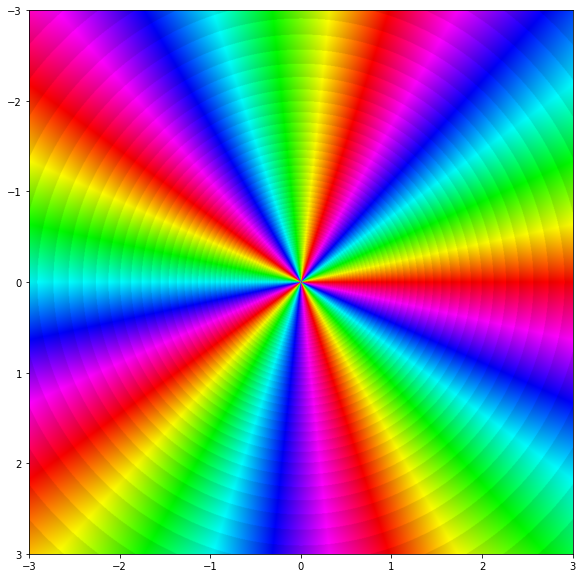

In [49]:
x = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, x)
Z = X + 1j*Y

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot()

phaseplot(ax1, Z**5, x, x)
plt.show()

(comp_polynomial)=
## Polynomials

A complex polynomial of $n$-th degree is a function $p : \mathbb{C} \to \mathbb{C}$ of the form

$$ p_n (z) = a_n z^n + a_{n-1} z^{n-1} + \cdots + a_1 z + a_0 $$

where $a_0, \dots, a_n \in \mathbb{C}$ are the coefficients of the polynomial and $a_n \neq 0$. A polynomial of $n$-th degree has exactly $n$ roots, but some of them may be equal.

For example, the function $p(z) = 2z^4 + (2-3i)z^2 + 1$ is a third degree (complex) polynomial.

(comp_rational)=
## Rational functions

A rational function is a function of the form

$$ r(z) = \frac{p(z)}{q(z)}, $$

where $p$ and $q$ are polynomials. The natural domain of $r$ is the set of all complex numbers such that $q$ is not a null-polynomial,

$$ D = \{ z \in \mathbb{C} : q(z) \neq 0 \}. $$

For example, the function

$$ r(z) = \frac{z^4 + 2z - 3}{z^2 + 3} $$

has a domain $D = \{ z \in \mathbb{C} : z^2 + 3 \neq 0 \} = \mathbb{C} \setminus \{ \pm i \sqrt{3} \}$. Let us plot it:

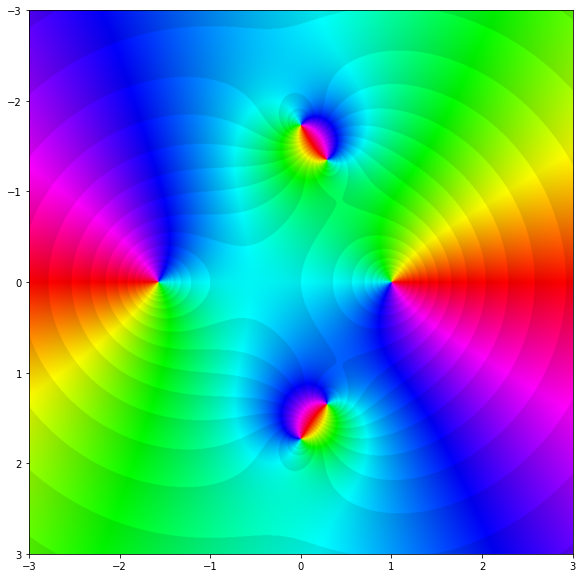

In [54]:
x = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, x)
Z = X + 1j*Y

f = (Z**4 + 2*Z - 3) / (Z**2 + 3)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

phaseplot(ax, f, x, x)
plt.show()

As expected, we have four zeros and two poles. 

(comp_exp)=
## Exponential function

The complex exponential function $\exp : \mathbb{C} \to \mathbb{C}$ is defined by extending the Taylor series of the real exponential to complex numbers. TODO: put this example somewhere?

$$ exp(z) \equiv e^x (\cos y + i \sin y) = e^x e^{iy}$$

This is what allows us to represent complex numbers in polar form. The usual properties of an exponential function still apply:

$$ e^{z_1 + z_2} = e^{z_1} e^{z_2}, \quad \frac{1}{e^z} = e^{-z}, \quad e^{z_1 - z_2} = \frac{e^{z_1}}{e^{z_2}}. $$

It is easy to separate $e^z$ into its real $u(x, y)$ and imaginary $v(x, y)$ part: $ \text{Re}(e^z) = e^x \cos y, \text{Im}(e^z) = e^x \sin y $. Let us show the real part on a surface plot:

```{margin} This is an interactive figure!
Make sure to rotate and move around the figure.
```

In [6]:
import plotly.offline
import plotly.graph_objects as go
from IPython.display import IFrame


x = np.linspace(-2, 2, 201)
y = np.linspace(-10, 10, 1001)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

f = np.exp(Z)

fig = go.Figure(data=[go.Surface(z=f.real, x=x, y=y)])
fig.update_layout(title='Real part of exp(z)', autosize=True)
fig.write_html("complexdata/exp_plotly.html")

IFrame("complexdata/exp_plotly.html", 800, 600)

Another way to plot complex functions is to plot both the real and imaginary part as a heat map:

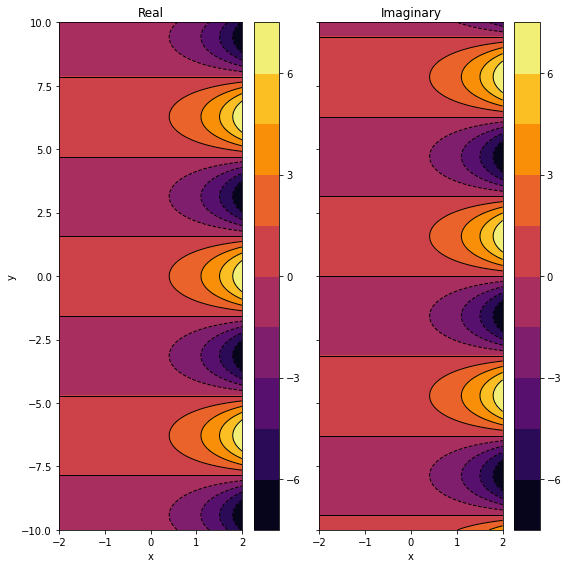

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

im = ax[0].contourf(f.real, levels=12, cmap='inferno', extent=[-2, 2, -10, 10])
ax[0].contour(f.real, levels=12, colors='k', extent=[-2, 2, -10, 10], linewidths=1.)
fig.colorbar(im, ax=ax[0])
ax[0].set_title('Real')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

im = ax[1].contourf(f.imag, levels=12, cmap='inferno', extent=[-2, 2, -10, 10])
ax[1].contour(f.imag, levels=12, colors='k', extent=[-2, 2, -10, 10], linewidths=1.)
fig.colorbar(im, ax=ax[1])
ax[1].set_title('Imaginary')
ax[1].set_xlabel('x')

plt.tight_layout()
plt.show()

Notice that a complex exponential function consists of a growing/decaying part $e^x$ and a periodic/oscillating part $\cos y + i \sin y$. Therefore, the complex exponential function is also periodic with a period $2\pi i$:

$$ e^{z + 2\pi i} = e^z. $$

Whether $e^x$ will grow or decay depends on the sign of $x$; it will grow if $x > 0$ and it will decay if $x < 0$. If $x=0$ it will just oscillate with unit amplitude, it will neither grow nor decay. Let us calculate the magnitude and phase of $e^z$:

$$ |e^z| = |e^x (\cos y + i \sin y) | = e^x (\cos^2y + \sin^2y) = e^x \\
\text{arg}(e^z) = \text{arg}(e^x) + \text{arg}(e^{iy}) = 0 + y = y$$

Since $e^x > 0$ for all $x$, we conclude that $e^z \neq 0$ for all $z \in \mathbb{C}$. So $0$ is not in the image of the exponential function, but all other complex numbers are.

Remember that the argument is periodic.

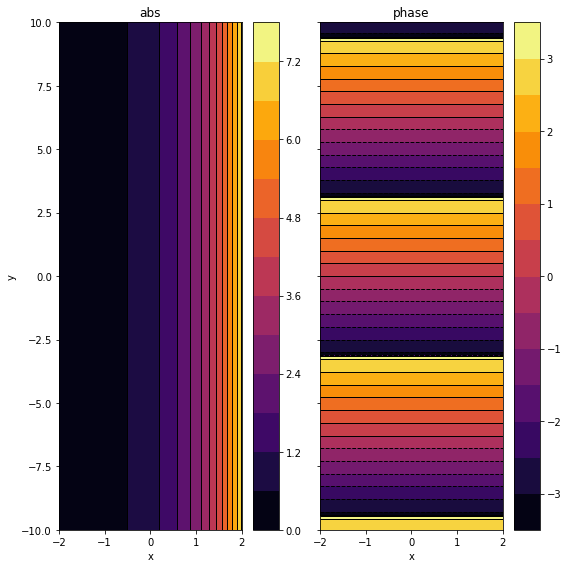

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

im = ax[0].contourf(np.abs(f), levels=12, cmap='inferno', extent=[-2, 2, -10, 10])
ax[0].contour(np.abs(f), levels=12, colors='k', extent=[-2, 2, -10, 10], linewidths=1.)
fig.colorbar(im, ax=ax[0])
ax[0].set_title('abs')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# We could have imported cmath and then cmath.phase(f)

im = ax[1].contourf(np.arctan2(f.imag, f.real), levels=12, cmap='inferno', extent=[-2, 2, -10, 10])
ax[1].contour(np.arctan2(f.imag, f.real), levels=12, colors='k', extent=[-2, 2, -10, 10], linewidths=1.)
fig.colorbar(im, ax=ax[1])
ax[1].set_title('phase')
ax[1].set_xlabel('x')

plt.tight_layout()
plt.show()

Or as a colour wheel graph:

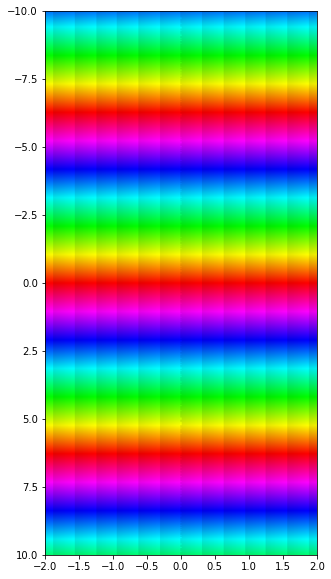

In [61]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

phaseplot(ax, f, x, y)

ax.set_aspect(0.4)
plt.show()

(comp_log)=
## Logarithm

We would like to extend the idea of a logarithm being the inverse of the exponential function, but since the complex exponential function is not bijective, the inverse function does not exist. What we mean is that the logarithm cannot be a single-valued function since $z = |z| e^{i(arg(z) + 2n \pi)}$ has the same value of the logarithm for all integers $n$ since it is periodic. However, as we saw above, the complex exponential function is injective on an interval of length $2 \pi$ so we can define an inverse on that interval.

Since the exponential function maps a sum to a product (i.e. $ e^{a+b} = e^a e^b $), the logarithm of a product must be equal to the sum of their logarithms (i.e. $ \ln(z_1 z_2) = \ln(z_1) + \ln(z_2) $):

$$ \begin{align}
Ln(z) & = Ln(|z|e^{i Arg(z)}) =  \ln(|z|) + \ln(e^{i Arg(z)}) \\
&:= \ln(|z|) + i(arg(z) + 2n \pi), \qquad n \in \mathbb{Z},
\end{align}$$

As with the argument (note the capital $Arg$ and $Ln$), we define the principal value of a logarithm for $n = 0$:

$$ \ln(z) = \ln(|z|) + i arg(z) $$

```{admonition} Examples

$$ Ln(1) = \ln(1) + i(arg(1) + 2n \pi) = 2n \pi i, \quad \ln(1) = 0 $$

$$ Ln(i) = i \left (\frac{\pi}{2} + 2n \pi \right ), \quad \ln(i) = \frac{\pi i}{2}$$

$$ Ln(-i) = i \left ( -\frac{\pi}{2} + 2n \pi \right ), \quad \ln(-i) = - \frac{\pi i}{2} $$

```

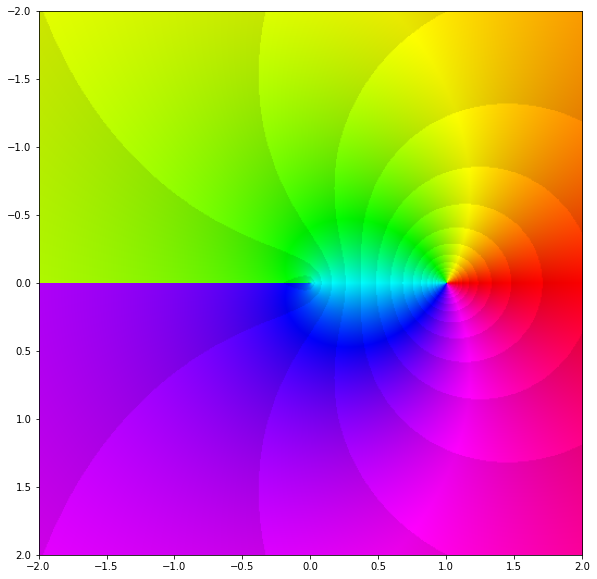

In [63]:
x = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, x)
Z = X + 1j * Y

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

phaseplot(ax, np.log(Z), x, x)
plt.show()

We see that $\log z$ has a zero at $1$ and a jump along $(- \infty, 0]$.

(comp_trig)=
## Trigonometric and hyperbolic functions

Trigonometric and hyperbolic functions of a complex variable are defined with the exponential function:

$$ 
\begin{aligned}
\sin z & := \frac{e^{iz} - e^{-iz}}{2i} \\
\cos z & := \frac{e^{iz} + e^{-iz}}{2} \\
\tan z & := \frac{\sin z}{\cos z} \\
\cot z & := \frac{\cos z}{\sin z}
\end{aligned} \qquad
\begin{aligned}
\sinh z & := \frac{e^{z} - e^{-z}}{2} = -i \sin (iz)\\
\cosh z & := \frac{e^{z} + e^{-z}}{2} = \cos (iz)\\
\tanh z & := \frac{\sinh z}{\cosh z} = -i \tan (iz)\\
\coth z & := \frac{\cosh z}{\sinh z} = i cot (iz)
\end{aligned}$$

````{admonition} Properties

   ```{list-table}
   :header-rows: 1
   :widths: 10 10 20 10 10
   :align: center
     
   * - $ f(z) $
     - Period $ f $
     - Zeros
     - Period $ g $
     - $ g(z) $
   * - $ \sin z $
     - $ 2 \pi $
     - $ k \pi $
     - $ \pi $
     - $ \tan z $
   * - $ \cos z $
     - $ 2 \pi $
     - $ (2k+1) \pi / 2 $
     - $ \pi $
     - $ \cot z $
   * - $ \sinh z $
     - $ 2 \pi i $
     - $ k \pi i $
     - $ \pi i $
     - $ \tanh z $
   * - $ \cosh z $
     - $ 2 \pi i $
     - $ (2k+1) \pi i / 2 $
     - $ \pi i $
     - $ \coth z $
   ```
   
for $k \in \mathbb{Z}$.

Functions $\sin z, \cos z, \sinh z$ and $\cosh z$ are defined on the entire set $\mathbb{C}$. Functions $\tan z, \cot z, \tanh z$ and $\coth z$ are defined on the entire $\mathbb{C}$ except the zeros of their denominators, i.e. respectively: $\cos z, \sin z, \cosh z$ and $\sinh z$.

We can check directly that the following is valid:

$$ e^{iz} = \cos z + i \sin z, \quad \forall z \in \mathbb{C}. $$

Addition formulae are valid:

$$ \sin (z_1 + z_2 ) = \sin z_1 \cos z_2 + \cos z_1 \sin z_2 \\
\cos (z_1 + z_2) = \cos z_1 \cos z_2 - \sin z_1 \sin z_2 $$

and

$$ \sin^2 z + \cos^2 z = 1 $$

````

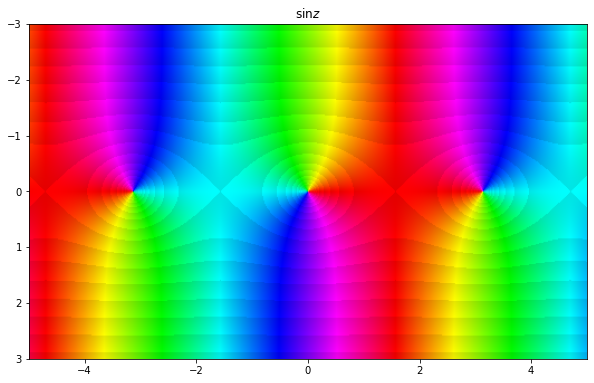

In [69]:
x = np.linspace(-5, 5, 500)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

phaseplot(ax, np.sin(Z), x, y)

ax.set_title(r'$\sin z$')

plt.show()